In [1]:
from sklearn.svm import SVC
import sklearn.metrics
import joblib
import matplotlib.pyplot as plt

In [2]:
train_features, train_labels = joblib.load('train_features.pkl')
val_features, val_labels = joblib.load('val_features.pkl')

train_X, val_X, train_y, val_y = train_features, val_features, train_labels, val_labels

In [3]:
model = SVC(class_weight='balanced', probability=True, random_state=1)
model.fit(train_X, train_y)

SVC(class_weight='balanced', probability=True, random_state=1)

In [4]:
prob = model.predict_proba(val_X)
pred = model.predict(val_X)

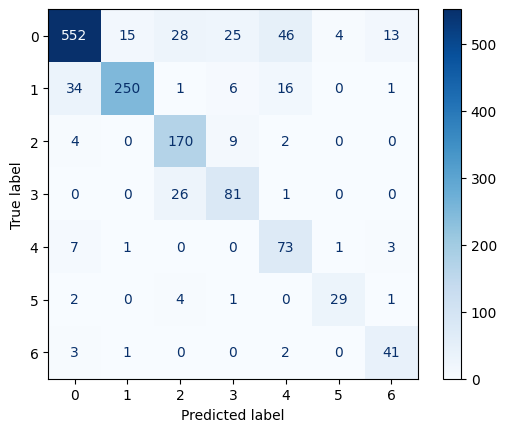

In [5]:
mcm = sklearn.metrics.confusion_matrix(val_y, pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=mcm,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [6]:
f1_score = sklearn.metrics.f1_score(val_y, pred, average='weighted')
print(f1_score)

0.8288800745335448


In [7]:
roc_auc_score = sklearn.metrics.roc_auc_score(val_y, prob, average='macro', multi_class='ovo')
print(roc_auc_score)

0.9730929824785546


In [8]:
from sklearn.metrics import classification_report

print(classification_report(pred, val_y))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       602
           1       0.81      0.94      0.87       267
           2       0.92      0.74      0.82       229
           3       0.75      0.66      0.70       122
           4       0.86      0.52      0.65       140
           5       0.78      0.85      0.82        34
           6       0.87      0.69      0.77        59

    accuracy                           0.82      1453
   macro avg       0.83      0.76      0.78      1453
weighted avg       0.83      0.82      0.82      1453



In [9]:
import pickle

with open("models\\SVM.pkl", "wb") as f:
    pickle.dump(model, f)